Q2:Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

Data Description:

The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch  # For Dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [3]:
#importing warnings to ignore warningd
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [14]:
#Load the dataset
airline=pd.read_csv('EastWestAirlines.csv')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [16]:
#checking shape of data
airline.shape

(3999, 12)

# EDA

In [17]:
#checking information about data
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [18]:
# checking null values
airline.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

There is no null value in dataset.

In [20]:
#Checking duplicated Rows
airline[airline.duplicated()].sum()

ID#                  0.0
Balance              0.0
Qual_miles           0.0
cc1_miles            0.0
cc2_miles            0.0
cc3_miles            0.0
Bonus_miles          0.0
Bonus_trans          0.0
Flight_miles_12mo    0.0
Flight_trans_12      0.0
Days_since_enroll    0.0
Award?               0.0
dtype: float64

There is no duplicate value in dataset.

In [22]:
# The id column is not important hence we are going to drop it
airline=airline.drop(['ID#'],axis=1)
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [23]:
#Generate Descriptive Statistics
airline.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# Hierarchical Clustering

In [24]:
#Normalize the data using Normalization Function
from sklearn.preprocessing import normalize

In [25]:
#check column names
airline.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [26]:
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [27]:
air_norm=pd.DataFrame(normalize(airline),columns=airline.columns)

In [29]:
air_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009


In [30]:
#check shape of data
air_norm.shape

(3999, 11)

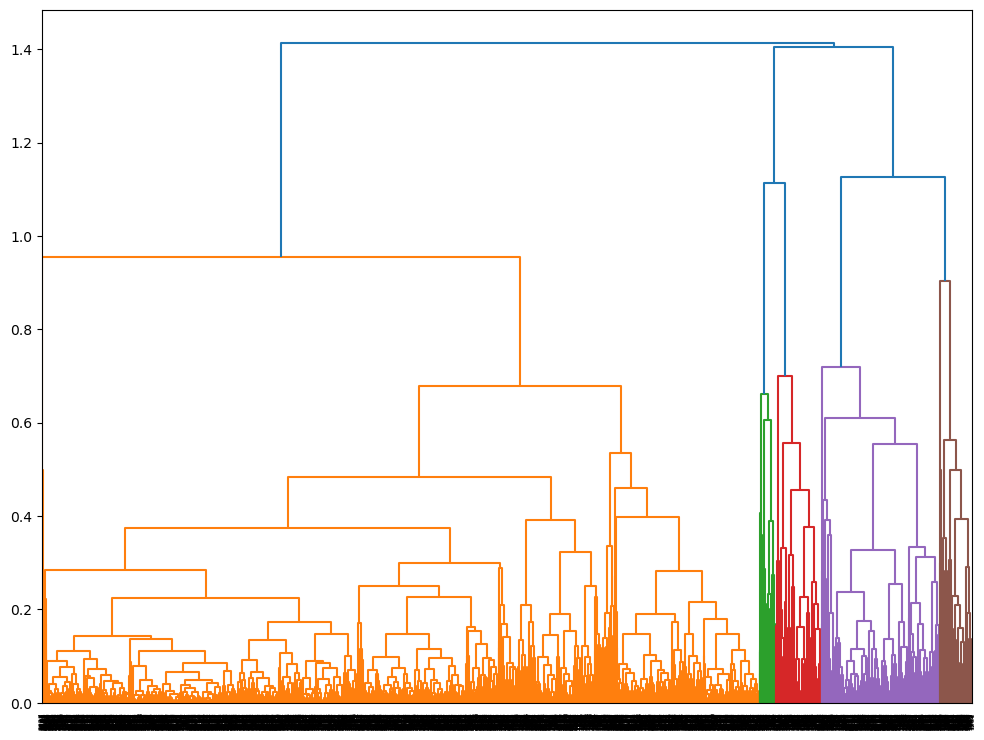

In [33]:
#Plot the hierarchical clustering as a dendrogram.
plt.figure(figsize=(12,9))
Dendrogram=sch.dendrogram(sch.linkage(air_norm,method='complete'))

In [34]:
#perform Hierarchical clustering(Agglomarative)
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')
hc

AgglomerativeClustering(linkage='average', n_clusters=4)

In [35]:
y_hc=hc.fit_predict(air_norm)
y_hc

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [36]:
#make dataframe and attached clusterId column
airline['h_ClusterId']=pd.DataFrame(y_hc,columns=['h_ClusterId'],)
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_ClusterId
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [39]:
airline['h_ClusterId'].value_counts()

2    3651
0     203
3      87
1      58
Name: h_ClusterId, dtype: int64

In [40]:
# Apply Groupby on the dataframe and count mean
airline.groupby('h_ClusterId').agg(['mean']).reset_index()

,h_ClusterId,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,23503.399015,97.591133,3.502463,1.014778,1.088670,48137.300493,18.472906,770.669951,2.133005,4308.911330,1.000000
1,1,4931.310345,84.310345,1.189655,1.051724,1.000000,5033.017241,9.224138,793.172414,2.482759,4373.120690,0.637931
2,2,79175.229526,151.085456,2.018351,1.014243,1.008491,16013.185155,11.485620,447.798685,1.343194,4086.349493,0.336894
3,3,2364.827586,0.000000,1.000000,1.000000,1.000000,394.413793,2.034483,27.586207,0.137931,4856.402299,0.126437


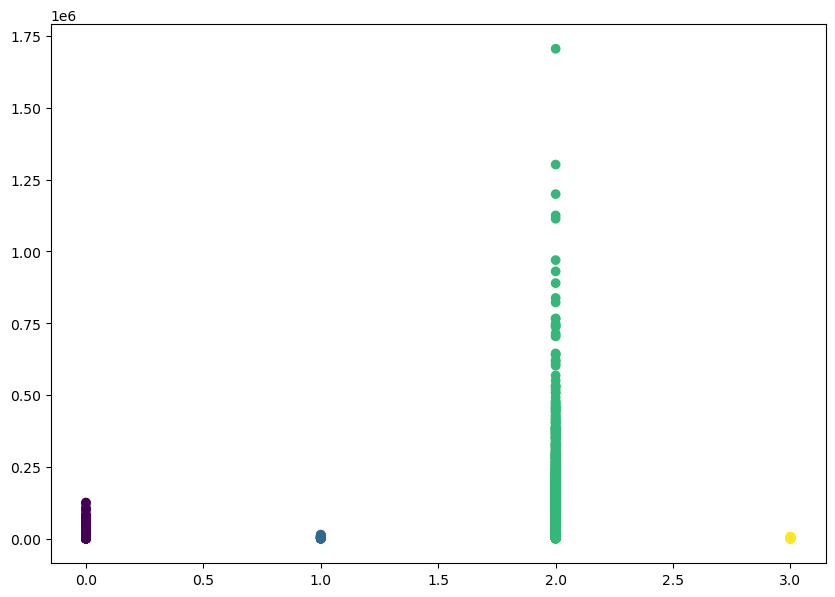

In [41]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline['h_ClusterId'],airline['Balance'], c=y_hc)

Conclusion:

In Hierarchical Clustering we have 4 clusters.

we made clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers.

In 3rd cluster (clusterId=2) we have maximum number of passengers that have similar caharecteristics.

In 2nd and 4th clusters (clusterId=1 & clusterId=3) we have minimum number of passengers that have similar characteristics as compared to other clusters.

In [42]:
#checking silhouette score for Hierarchical Clustering
silhouette_score(air_norm,y_hc)

0.5734105132825342

# KMeans Clustering

In [43]:
#importing library for k-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [47]:
airline_k=pd.read_csv('EastWestAirlines.csv')
airline_k.sample()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
2714,2736,32824,0,1,1,1,1660,5,100,1,2339,1


In [48]:
airline_k=airline_k.drop(['ID#'],axis=1)
airline_k.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [49]:
#Normalize the data using Normalization Function
from sklearn.preprocessing import normalize

In [50]:
airline_k.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [51]:
#normalize the data
airk_norm=pd.DataFrame(normalize(airline_k),columns=airline_k.columns)

In [52]:
airk_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009


In [53]:
airk_norm.shape

(3999, 11)

In Hierarchical clustering we don't have any function to decide best number of clusters.

But, in KMeans clustering with the help of Elbow Method we can decide best number of clusters

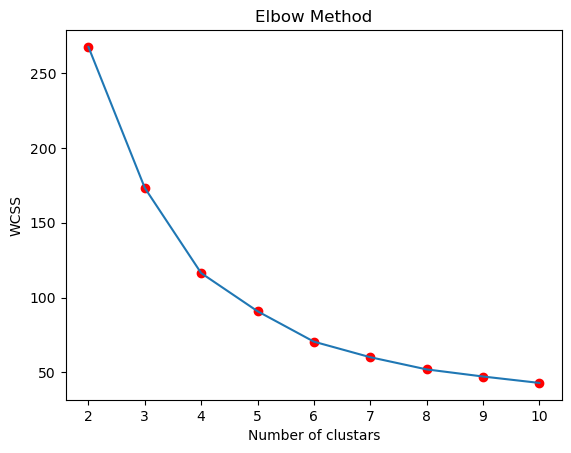

In [54]:
#perform KMeans clustering
#plot Elbow Chart to decide best number of clusters.
wcss=[]
for i in range (2,11):
    Kmeans=KMeans(n_clusters=i,random_state=42)
    Kmeans.fit(airk_norm)
    wcss.append(Kmeans.inertia_)
    
plt.plot(range(2,11),wcss) 
plt.scatter(range(2,11), wcss, color = "red")
plt.title('Elbow Method')
plt.xlabel('Number of clustars')
plt.ylabel('WCSS')
plt.show()

As from Elbow Chart we conclude that 5 numbers of clusters are best.

In [56]:
#within cluster sum of squared
wcss

[267.59741095991853,
 173.27025625511413,
 116.32481600680407,
 90.8239863037296,
 70.47296409901435,
 60.079652613387665,
 51.93503081743262,
 47.17230616681258,
 42.884801868533756]

In [57]:
# selecting 4 clusters from above elbow chart plot
Kmeans=KMeans(n_clusters=5)
Kmeans=Kmeans.fit_predict(airk_norm)
Kmeans

array([4, 3, 4, ..., 0, 4, 3])

In [58]:
#make dataframe and attached clusterId column
airline_k['k_ClusterId']=pd.DataFrame(Kmeans,columns=['k_ClusterId'])
airline_k

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_ClusterId
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,3
2,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,14776,0,1,1,1,500,1,0,0,6952,0,3
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [59]:
#count of rows in each cluster
airline_k['k_ClusterId'].value_counts()

4    2142
0    1006
3     388
1     352
2     111
Name: k_ClusterId, dtype: int64

In [60]:
#apply Groupby on dataframe and count mean
airline_k.groupby('k_ClusterId').agg(['mean']).reset_index()

,k_ClusterId,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,70743.739563,116.122266,3.135189,1.025845,1.019881,32531.393638,17.626243,442.855865,1.312127,4045.261431,0.491054
1,1,27526.798295,115.818182,3.247159,1.034091,1.071023,41812.809659,17.599432,676.107955,1.951705,4226.252841,0.903409
2,2,2415.576577,0.000000,1.009009,1.000000,1.000000,850.189189,3.036036,48.612613,0.171171,4723.225225,0.225225
3,3,11768.858247,55.121134,1.005155,1.000000,1.000000,984.778351,3.469072,93.216495,0.293814,4908.760309,0.172680
4,4,97404.121382,185.499533,1.604575,1.009337,1.001867,9636.360411,9.704015,520.399627,1.565359,3960.816060,0.269374


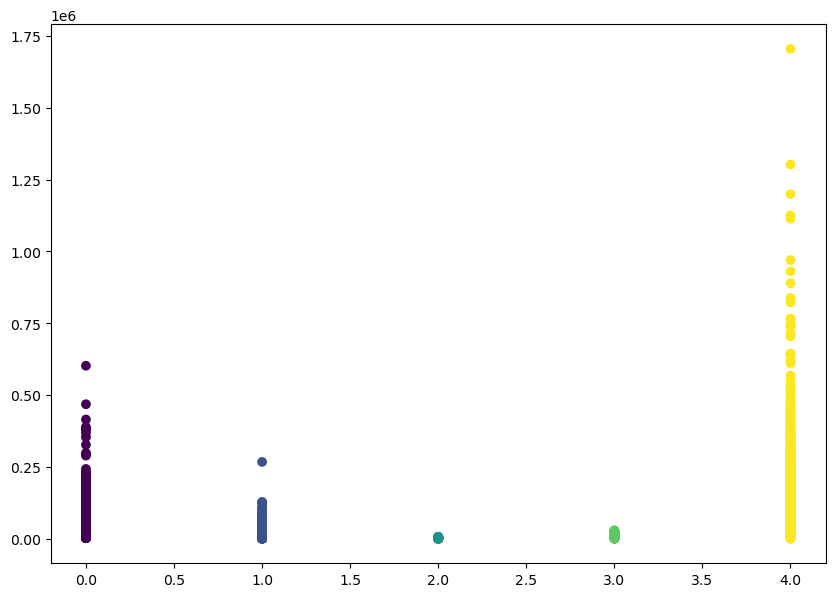

In [61]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline_k['k_ClusterId'],airline_k['Balance'], c=Kmeans)

Conclusion:

In KMeans we have 5 clusters.

we made clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers.

In 5th cluster (clusterId=5) we have maximum number of passengers that have similar caharecteristics.

In 2nd and 4th clusters (clusterId=1 & clusterId=3) we have minimum number of passengers that have similar characteristics as compared to other clusters

In [63]:
#checking silhouette score for Hierarchical Clustering
silhouette_score(airk_norm,Kmeans)

0.5015436616997834

# DBSCAN

In [64]:
#import library for DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [65]:
#load the dataset
airline_d=pd.read_csv('EastWestAirlines.csv')

In [66]:
#check firts 5 rows
airline_d.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [67]:
airline_d=airline_d.drop(['ID#'],axis=1)
airline_d

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


<AxesSubplot:>

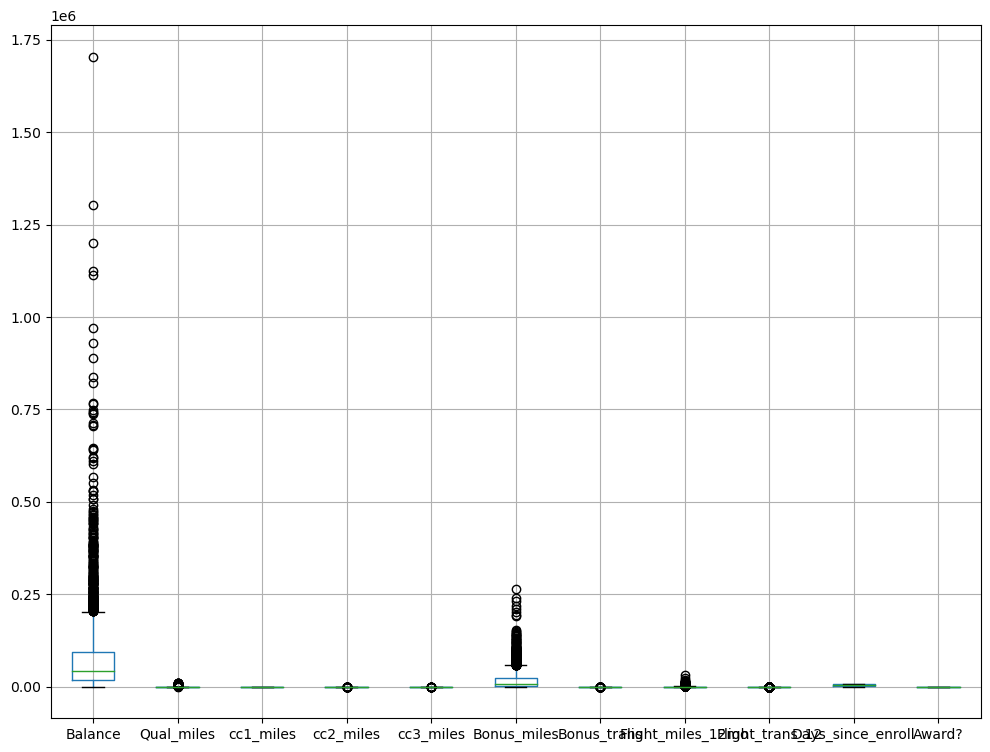

In [69]:
#make a boxplot to check noisy points (outliers)
airline_d.boxplot(figsize=(12,9))

In [70]:
airline_d.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [71]:
#convert into arrays.(.values)
array=airline_d.values

In [72]:
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [73]:
#Normalize the data using Normalization Function- Standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(array)
X = scaler.transform(array)

In [74]:
#perform DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=25)
dbscan.fit(X)

DBSCAN(eps=3, min_samples=25)

In [75]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
#make dataframe and attached clusterId column
airline_d['d_ClusterId']=pd.DataFrame(dbscan.labels_,columns=['d_ClusterId'])
airline_d

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,d_ClusterId
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [78]:
#apply Groupby on the dataframe and count mean
airline_d.groupby('d_ClusterId').agg(['mean']).reset_index()

,d_ClusterId,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,208994.778481,1651.753165,2.303797,1.367089,1.310127,44638.310127,23.968354,3337.905063,9.354430,4643.151899,0.664557
1,0,68031.901588,82.097631,2.049466,1.000000,1.000000,16013.899245,11.093205,341.675085,1.045301,4096.980213,0.358240


In [77]:
airline_d['d_ClusterId'].value_counts()

 0    3841
-1     158
Name: d_ClusterId, dtype: int64

<AxesSubplot:>

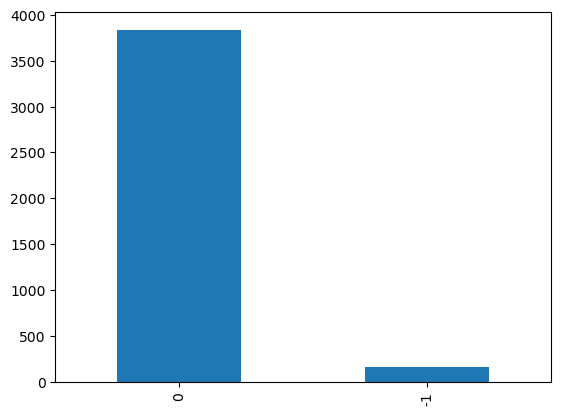

In [79]:
#Barplot of clusterId
airline_d["d_ClusterId"].value_counts().plot.bar()

Conclusion:

In DBSCAN we have 2 clusters.

clusterId=-1 has noisy records (outliers).

In [80]:
#Checking silhouette score
silhouette_score(array,dbscan.labels_)

0.5768112141322941

#### A Silhouette score ranges from -1 to 1.
#### With -1 being the worst score possible and 1 being the best sore.
#### Silhouette score of 0 suggest overlaping of clusters.